In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [3]:
#read the datasets
df = pd.read_csv('glass.csv')
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None
               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.

In [ ]:
#check fo missing values
print("missing values",df.isnull().sum())

In [5]:
#This block handles missing values by imputing them with the median of each column using SimpleImputer.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df[df.columns] = imputer.fit_transform(df[df.columns])

#The features (all columns except 'Type') are scaled using StandardScaler to standardize the data, making it have a mean of 0 and a standard deviation of 1.
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df.drop('Type',axis=1))

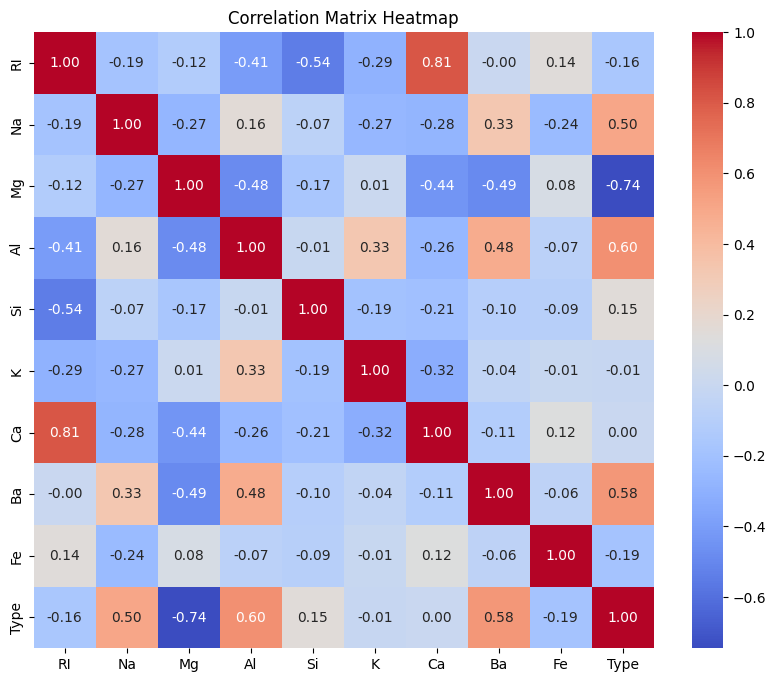

In [6]:
#plot the corelation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [9]:
#divide the data set
X = x_scaled
y = df['Type'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [10]:
#Define Custom Distance Functions
def custom_euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))
def custom_manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

In [12]:
#Initialize the KNN Classifiers with Custom Distances
k = 3  # Number of neighbors
clf_custom_euclidean = KNeighborsClassifier(n_neighbors=k, metric=custom_euclidean_distance)
clf_custom_manhattan = KNeighborsClassifier(n_neighbors=k, metric=custom_manhattan_distance)

In [13]:
#Fit the KNN Classifiers to the Training Data
clf_custom_euclidean.fit(X_train, y_train)
clf_custom_manhattan.fit(X_train, y_train)


KNeighborsClassifier(metric=<function custom_manhattan_distance at 0x71b70968af80>,
                     n_neighbors=3)

In [16]:
# Make Predictions on the Test Set with Custom Distances
# python
predictions_custom_euclidean = clf_custom_euclidean.predict(X_test)
predictions_custom_manhattan = clf_custom_manhattan.predict(X_test)


In [19]:
cm_custom_euclidean = confusion_matrix(y_test, predictions_custom_euclidean)
cm_custom_manhattan = confusion_matrix(y_test, predictions_custom_manhattan)

In [20]:
accuracy_custom_euclidean = accuracy_score(y_test, predictions_custom_euclidean)
accuracy_custom_manhattan = accuracy_score(y_test, predictions_custom_manhattan)
print("Accuracy with Euclidean Distance:", accuracy_custom_euclidean)
print("Accuracy with Manhattan Distance:", accuracy_custom_manhattan)


Accuracy with Euclidean Distance: 0.6615384615384615
Accuracy with Manhattan Distance: 0.6923076923076923


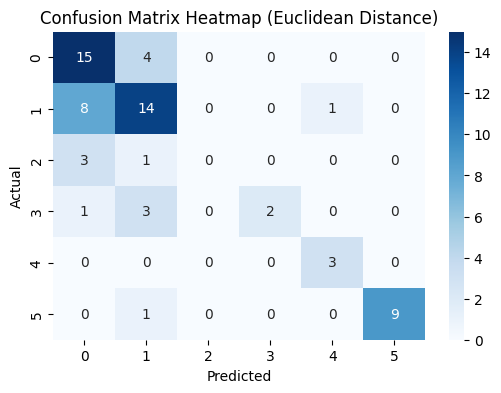

In [21]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_custom_euclidean, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap (Euclidean Distance)')
plt.show()


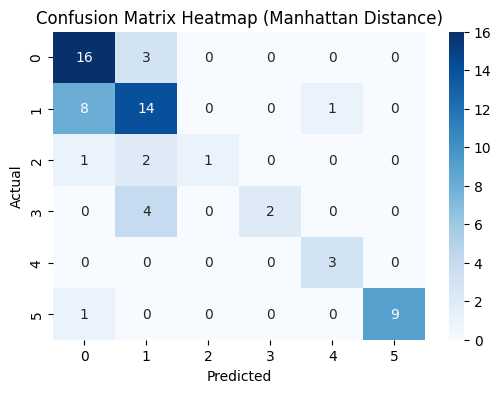

In [22]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_custom_manhattan, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap (Manhattan Distance)')
plt.show()
